In [1]:
# Importing Packages
%matplotlib inline
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy
from scipy.sparse import csr_matrix
from scipy.sparse.linalg import svds
import os
import warnings
import sklearn
warnings.filterwarnings('ignore')

# Preprocessing
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# Training the classifier
from sklearn.pipeline import Pipeline 
from sklearn.model_selection import train_test_split, GridSearchCV

# Classifiers for building models
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics.pairwise import cosine_similarity

# Background:

We live in a world surrounded by multiple products that fit our varied needs. Consumers are often overwhelmed and stressed because of the unlimited choices the website offers. 

**Problem Statement**

I, personally, have spent a lot of time in getting to learn about products, their attributes, and benefits. The main problem customers face now has gone from lack of information to information overload and filter failure. Additionally consumers encounter:
- slower load times 
- irrelevant product previews
- insufficient feature attributes

Amazon leverage recommender systems to help them identify user preferences and choices of specific products. This will not only help Amazon gather information about their existing customers,  but it also helps Amazon's clients boost revenue incrementally. Recommendation systems offer convenience and it helps you choose a product that fits your needs.
 

# Goal:

My goal is to build a recommendation model to better predict user’s electronic product choices for Amazon. I chose the [Amazon Electronics Dataset](https://cseweb.ucsd.edu/~jmcauley/datasets.html#market_bias) to provide easy access, convenience, and personalized choice for the e-commerce user. 

I believe a recommender system could solve e-commerce user's product choice problem due to the following reasons:
- It provides relevant recommendation to match the user preferences
- Increases user engagement
- Helps the user find the right product
- Helps Amazon boost revenue in the product category
- Saves time for the user and the business/brand

# What is a recommendation system?

Recommendation engines identify things a user may like depending on the products the user interacted in the past. It provides a way of surfacing new content that a user might like but didn't know to search for.It allows the company to personalize user experience, by recording likes and dislikes. Moreover, recommenders can suggest new products or apps relevant to the interest that the user has shared; thereby modelling peoples' preferences and behavior.

In Amazon's Electronics platform, Amazon aggregates the items from similar customers, eliminates items the user has already purchased or rated, and recommends the remaining item to the user. This system has also helped Amazon interact with their customers by engaging in their product choices. This has inherently helped Amazon become a more viable e-commerce platform in the modern day.

Amazon currently uses item-to-item collaborative filtering, which scales to massive data sets and produces high-quality recommendations in real time.This type of filtering matches each of the user’s purchased and rated items to similar items, then combines those similar items into a recommendation list for the user.Their recommendation algorithm is an effective way of creating a personalized shopping experience for each customer which helps Amazon increase average order value and the amount of revenue generated from each customer.

Recommender systems offer the following benefits:

**For Users:**
- Helps users find related content
- Helps users explore new items
- Improves user decision making (by only leaving the most relevant items for the user)

**For producers:**
- Increases user satisfaction and engagement
- Learns more about the customers by examing interactions to their products
- Changes user behavior

# Dataset Attributes

The dataset entails the following 8 features:

- user_id: unique id for each user
- item_id: unique id for each product
- rating: from 1.0 - 5.0
- timestamp: time of the rating
- model_attr: what gender is the product suitable for
- category: the specific class of the electronic category
- brand: the specific electronic brand
- year: year in which the electronic was purchased
- user_attr: gender specific choices
- split

We load in the data set using pandas `read_csv()` utility.

In [2]:
import os
electronics = "/home/kaneeshadawood/df_electronics.csv"

# Loading data from the csv file. 
data = pd.read_csv("/home/kaneeshadawood/df_electronics.csv")
data.head(10)

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split
0,0,0,5.0,1999-06-13,Female,Portable Audio & Video,NaN,1999,NaN,0
1,0,1,5.0,1999-06-14,Female,Portable Audio & Video,NaN,1999,NaN,0
2,0,2,3.0,1999-06-17,Female,Portable Audio & Video,NaN,1999,NaN,0
3,0,3,1.0,1999-07-01,Female,Portable Audio & Video,NaN,1999,NaN,0
4,0,4,2.0,1999-07-06,Female,Portable Audio & Video,NaN,1999,NaN,0
5,0,5,2.0,1999-07-12,Female,Portable Audio & Video,NaN,1999,NaN,0
6,0,6,5.0,1999-07-13,Female,Portable Audio & Video,NaN,1999,NaN,0
7,0,7,2.0,1999-07-13,Female,Portable Audio & Video,NaN,1999,NaN,0
8,0,8,4.0,1999-07-16,Female,Portable Audio & Video,NaN,1999,NaN,0
9,0,9,5.0,1999-08-20,Female,Portable Audio & Video,NaN,1999,NaN,0


Using the `info` commands we can get a brief description of our dataset. This is important in order to enable us understand the dataset we are working with.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1292954 entries, 0 to 1292953
Data columns (total 10 columns):
item_id       1292954 non-null int64
user_id       1292954 non-null int64
rating        1292954 non-null float64
timestamp     1292954 non-null object
model_attr    1292954 non-null object
category      1292954 non-null object
brand         331120 non-null object
year          1292954 non-null int64
user_attr     174124 non-null object
split         1292954 non-null int64
dtypes: float64(1), int64(4), object(5)
memory usage: 98.6+ MB


In [4]:
# Shapes of dataframes
print("electronics:", data.shape)

electronics: (1292954, 10)


Our dataset consist of 1292954 entries and 10 fields. There are both numerical and categorical variable features. Let's eleminate some features but first let's confirm the null values:

In [5]:
#missing data
total = data.isnull().sum().sort_values(ascending=False)
percent = (data.isnull().sum()/data.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
user_attr,1118830,0.865329
brand,961834,0.743904
split,0,0.000000
year,0,0.000000
category,0,0.000000
model_attr,0,0.000000
timestamp,0,0.000000
rating,0,0.000000
user_id,0,0.000000
item_id,0,0.000000


We have a higher proportion of missing values in the 'user_attr' and 'brand' columns. For simplicity's sake, I will drop these columns while preprocessing. 

The features that I choose to keep in the recommender are: 'user_id', 'item_id', 'rating' and 'category'. I believe that these are useful features in building a recommender system.

In [6]:
#Who are the top 10 users based on ratings?
most_rated = data.groupby('user_id').size().sort_values(ascending=False)[:10]
print('Top 10 users based on ratings: \n',most_rated)

Top 10 users based on ratings: 
 user_id
142967    41
30661     38
89185     37
46878     34
80476     34
247264    32
22606     32
18111     32
7605      32
3939      31
dtype: int64


In [8]:
# Has the customer rated the item twice?

purchase_ids = ['item_id', 'user_id']

# Get a dataframe consisting only of reviews that are duplicated
duplicates = data[data.duplicated(subset=purchase_ids)].sort_values(purchase_ids)
duplicates

,item_id,user_id,rating,timestamp,model_attr,category,brand,year,user_attr,split


In [7]:
BYTES_TO_MB_DIV = 0.000001
def print_memory_usage_of_data_frame(df):
    mem = round(df.memory_usage().sum() * BYTES_TO_MB_DIV, 3) 
    print("Memory usage is " + str(mem) + " MB")
    
print_memory_usage_of_data_frame(data)

Memory usage is 103.436 MB


Since we have a very large dataset and I choose a subset of the dataset to perform our analysis and build the recommender models.

In [8]:
#Taking subset of the dataset
data = data.iloc[:300000,0:]
data.shape

(300000, 10)

# Data Cleaning and Preprocessing

In our initial data exploration phase we discovered that both 'user_attr' and 'brand' have missing values. I will drop these columns since it does not provide meaningful insights to build our recommender model. In addition to these columns I will also drop 'timestamp','brand','split','year','model_attr'. 

In [9]:
# Dropping irrelevant columns
data_clean = data.drop(columns=['user_attr','timestamp','brand','split','year','model_attr']) 
data_clean.head()

,item_id,user_id,rating,category
0,0,0,5.0,Portable Audio & Video
1,0,1,5.0,Portable Audio & Video
2,0,2,3.0,Portable Audio & Video
3,0,3,1.0,Portable Audio & Video
4,0,4,2.0,Portable Audio & Video


Next, let's drop the duplicate categories and items and leave the most up-to-date features.

In [10]:
data_clean[['category',
         'item_id']].drop_duplicates().category.value_counts().head(5)

Camera & Photo             1534
Computers & Accessories    1244
Headphones                  598
Portable Audio & Video      443
Accessories & Supplies      391
Name: category, dtype: int64

Our dataset is highly sparse so let's use pandas sparse structure to store sparse data:

In [11]:
count = data_clean.user_id.value_counts()
final_df = data_clean[data_clean.user_id.isin(count[count >=15].index)]
print('Number of users who have rated 15 or more items =', len(final_df))
print('Number of unique users in the final data = ', final_df['user_id'].nunique())
print('Number of unique products in the final data = ', final_df['user_id'].nunique())

Number of users who have rated 15 or more items = 198
Number of unique users in the final data =  10
Number of unique products in the final data =  10


In [12]:
#constructing the pivot table to fll in the NAN values with '0'
final_ratings_matrix = final_df.pivot(index = 'user_id', columns ='item_id', values = 'rating').fillna(0)
final_ratings_matrix.head()

item_id,74,75,79,88,92,98,109,121,143,174,...,4385,4397,4401,4430,4446,4458,4536,4558,4559,4628
user_id,,,,,,,,,,,,,,,,,,,,,
1277,5.0,5.0,0.0,5.0,0.0,5.0,4.0,2.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1670,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4934,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7605,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18111,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,5.0,0.0,3.0,0.0,0.0,0.0,0.0


In [13]:
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

Shape of final_ratings_matrix:  (10, 156)


In [14]:
#Calucating the density of the rating marix
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)
density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

given_num_of_ratings =  198
possible_num_of_ratings =  1560
density: 12.69%


A sparse matrix is a one in which the majority of the values are zero. The proportion of zero elements to non-zero elements is referred to as the sparsity of the matrix. Such "empty," or NA, values take up storage space in the file.

Our density value also indicates that this is a sparse matrix. However, we have replaced the 'NA' values with zeros

# Data Exploration

Now let's dive into exploring the different features of our dataset:

**Rating**

In [15]:
# What's the minimum and maximum rating?
print('Minimum rating is: %d' %(data_clean.rating.min()))
print('Maximum rating is: %d' %(data_clean.rating.max()))

Minimum rating is: 1
Maximum rating is: 5


In [16]:
# get count
rating_count = pd.DataFrame(data_clean.groupby('rating').size(), columns=['count'])
rating_count.head(10)

,count
rating,
1.0,30489
2.0,18344
3.0,24717
4.0,61215
5.0,165235


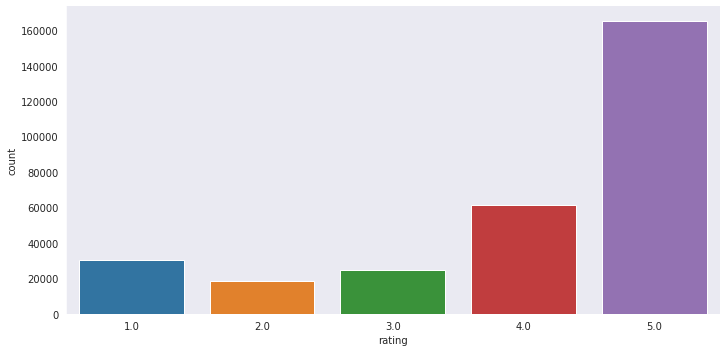

In [17]:
# Check the distribution of the rating
with sns.axes_style('dark'):
    g = sns.factorplot("rating", data=data_clean, aspect=2.0,kind='count')
    g.set_ylabels("count")

In [18]:
# add log count
rating_count['log_count'] = np.log(rating_count['count'])
rating_count.head()

,count,log_count
rating,,
1.0,30489,10.325121
2.0,18344,9.817058
3.0,24717,10.115247
4.0,61215,11.022148
5.0,165235,12.015124


In [19]:
# How many unique users and products?

# Number of unique user id  in the data
print('Number of unique users in Raw data = ', data_clean['user_id'].nunique())
# Number of unique product id  in the data
print('Number of unique products in Raw data = ', data_clean['item_id'].nunique())

Number of unique users in Raw data =  280341
Number of unique products in Raw data =  4723


Our findings indicate that a higher number of users are extremely statisfied with Amazon's electronic products. As you could see, more users(165235) have rated 5.0, and 61215 users have rated 4.0. This is really good for Amazon's product base.

**Items and Users**

In [20]:
# how many items were rated by the same user?
(data_clean.user_id.value_counts().rename_axis('id').reset_index(
    name='frequency').frequency.value_counts(
        normalize=False).rename_axis('item_id').to_frame().head(5))

,frequency
item_id,
1,264880
2,12947
3,1766
4,412
5,150


We can see that over 80% of our rating dataset users that have only rated a single product.

In [21]:
# Summary Statistics
data_clean.describe()

,item_id,user_id,rating
count,300000.000000,300000.000000,300000.000000
mean,1759.974443,137621.144997,4.041210
std,1038.854518,81142.304585,1.338184
min,0.000000,0.000000,1.000000
25%,974.000000,66878.750000,4.000000
50%,1662.000000,136470.500000,5.000000
75%,2471.000000,207644.250000,5.000000
max,4722.000000,280340.000000,5.000000


The mean rating is 4.04 out of 5.0, which is really good. This means users are satisfied about with the electronic products Amazon offers. 

In [22]:
# How many unique categories?
len(data_clean['category'].unique())

10

In [23]:
# What is the most popular item category? (based on rating)
percent = data_clean['category'].value_counts(normalize=True) * 100
category_count = data_clean['category'].value_counts()

# total
total = pd.concat([category_count, percent], axis=1, keys=['Total', 'Percent'])
total.head(10)

,Total,Percent
Computers & Accessories,82166,27.388667
Headphones,67369,22.456333
Camera & Photo,60766,20.255333
Accessories & Supplies,42457,14.152333
Portable Audio & Video,21001,7.000333
Television & Video,12369,4.123000
Car Electronics & GPS,7935,2.645000
Home Audio,4289,1.429667
Security & Surveillance,1248,0.416000
Wearable Technology,400,0.133333


Let us now visualize the category to see how it has been distributed across the items in the Amazom electronics dataset.

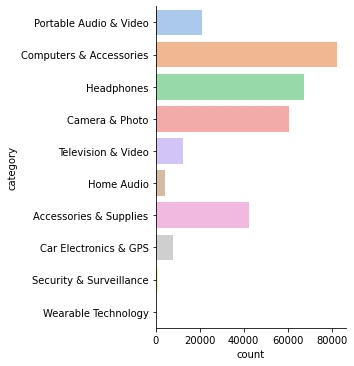

In [24]:
sns.catplot(y="category", kind="count",
            palette="pastel",
            data=data_clean);

It is interesting to spot that computer & accessories and headphones are the highly demanded electronic product category. Next in line are camera & photo and headphones. There is a very low demand for security & surveillance and wearable technology.

In [25]:
# How many items are rated in this dataset?
item_count = pd.DataFrame(data_clean.groupby('item_id').size(), columns=['count'])
item_count.head()

,count
item_id,
0,118
1,56
2,2073
3,154
4,9


Let's now filter the data to find the most popular items for a threshold of 50.

In [26]:
# filter data
popularity_thres = 50
popular_items = list(set(item_count.query('count >= @popularity_thres').index))
drop_items = data_clean[data_clean.item_id.isin(popular_items)]
print('shape of original ratings data: ', data_clean.shape)
print('shape of ratings data after dropping unpopular items: ', drop_items.shape)

shape of original ratings data:  (300000, 4)
shape of ratings data after dropping unpopular items:  (253083, 4)


In [27]:
# get number of ratings given by every user
user_count = pd.DataFrame(drop_items.groupby('user_id').size(), columns=['count'])
user_count.head()

,count
user_id,
0,1
1,1
2,1
3,1
4,1


Let's now plot the frequency distribution of the items rated.

Text(0, 0.5, 'number of ratings')

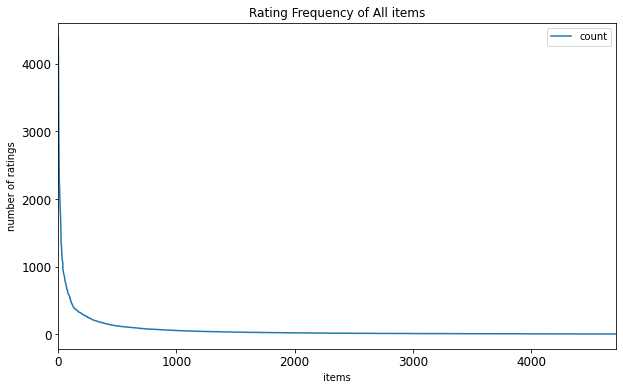

In [28]:
# plot rating frequency of all user ratings
ax = item_count \
    .sort_values('count', ascending=False) \
    .reset_index(drop=True) \
    .plot(
        figsize=(10, 6),
        title='Rating Frequency of All items',
        fontsize=12
    )
ax.set_xlabel("items")
ax.set_ylabel("number of ratings")

Let's plot the same distribution with a log scale

Text(0, 0.5, 'number of ratings (log scale)')

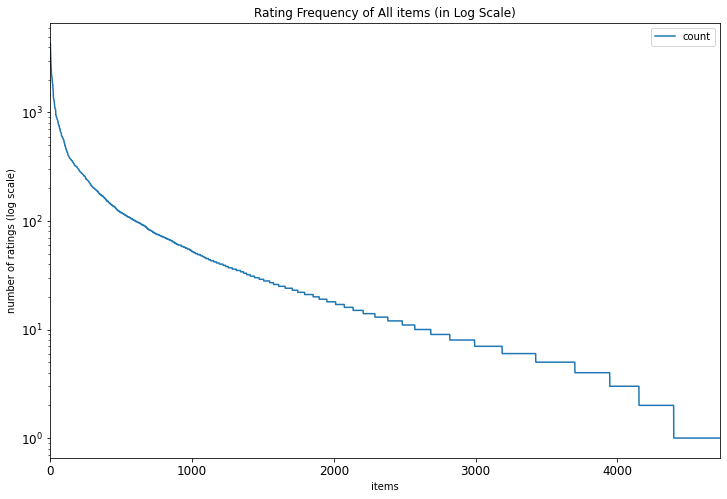

In [29]:
# plot rating frequency of all movies in log scale
ax = item_count \
    .sort_values('count', ascending=False) \
    .reset_index(drop=True) \
    .plot(
        figsize=(12, 8),
        title='Rating Frequency of All items (in Log Scale)',
        fontsize=12,
        logy=True
    )
ax.set_xlabel("items")
ax.set_ylabel("number of ratings (log scale)")

Let's look closer by displaying top quantiles of rating counts:

In [30]:
item_count['count'].quantile(np.arange(1, 0.6, -0.05))

1.00    4392.0
0.95     261.0
0.90     126.8
0.85      82.0
0.80      57.0
0.75      41.0
0.70      31.0
0.65      25.0
Name: count, dtype: float64

So about 1% of movies have roughly 4392 or more ratings, 5% have 261 or more, and 20% have 57 or more. Since we have so many items, we'll limit it to the top 25%. This is arbitrary threshold for popularity and we have pretty good amount of items for modeling. We should implement this because:

- Memory issue: we don't want to run into the “MemoryError” during model training
- Improve KNN performance: lesser known items have ratings from fewer users, making the pattern more noisy. Droping out less known items can improve recommendation quality

Let's now create a rating threshold and eliminate the inactive users:

In [31]:
# filter data
ratings_thres = 50
active_users = list(set(user_count.query('count >= @ratings_thres').index))
drop_users = drop_items[drop_items.user_id.isin(active_users)]
print('shape of original ratings data: ', data_clean.shape)
print('shape of ratings data after dropping both unpopular items and inactive users: ', drop_users.shape)

shape of original ratings data:  (300000, 4)
shape of ratings data after dropping both unpopular items and inactive users:  (0, 4)


Now that we have preprocessed and identified the features let's split the data into two subsets:

## Train Test Split

To understand model performance, dividing the dataset into a training set and a test set is a good strategy. Let's define our variables.

In [32]:
#Split the data randomnly into train and test datasets into 70:30 ratio
train_data, test_data = train_test_split(data_clean, test_size = 0.3, random_state=0)

In [33]:
print('Shape of training data: ',train_data.shape)
print('Shape of testing data: ',test_data.shape)

Shape of training data:  (210000, 4)
Shape of testing data:  (90000, 4)


In [34]:
# Save train data
print("Saving train data")

train_data = train_data.to_csv('train.csv', index = False)
print("Train data saved to data/train.csv")

# Save test data
print("Saving test data")
test_data = test_data.to_csv('test.csv', index = False)
print("Test data saved to data/test.csv")

Saving train data
Train data saved to data/train.csv
Saving test data
Test data saved to data/test.csv


# Building a User-based Collaborative Filtering model

Collaborative methods for recommender systems are methods that are based solely on the past interactions recorded between users and items in order to produce new recommendations. These interactions are stored in the so-called “user-item interactions matrix”.

The main advantage of collaborative approaches is that they require no information about users or items and, so, they can be used in many situations. Moreover, the more users interact with items the more new recommendations become accurate: for a fixed set of users and items, new interactions recorded over time bring new information and make the system more and more effective.

The User-based collaborative model finds similar users and gives a recommendation based on what other people with similar patterns appreciated. It identifies users that are similar to the queried user and estimate the desired rating to be the weighted average of the ratings of these similar users.

In [35]:
train_data = pd.read_csv("/home/kaneeshadawood/train.csv")
train_data.head()

,item_id,user_id,rating,category
0,259,75408,3.0,Headphones
1,2523,209055,5.0,Computers & Accessories
2,1584,139519,1.0,Headphones
3,3282,190091,2.0,Computers & Accessories
4,1225,135719,4.0,Headphones


Let's now get the mean rating of the training data and group them according to their 'item_id' and 'rating'

In [36]:
ratings = pd.DataFrame(train_data.groupby('item_id')['rating'].mean())
ratings.head()

,rating
item_id,
0,3.547619
1,3.794872
2,4.467596
3,3.310680
4,3.833333


Next we would like to see the number of ratings for each item. We do this by creating a number_of_ratings column. 

Let's now set a threshold for the minimum number of ratings as we build the recommender system. In order to create this new column we use pandas `groupby()` utility. We group by the 'category' column and then use the `count()` function to calculate the `number of ratings` each category got. Afterwards we view the new dataframe by using the `head()` function.

In [37]:
ratings['number_of_ratings'] = train_data.groupby('item_id')['rating'].count()
ratings.head()

,rating,number_of_ratings
item_id,,
0,3.547619,84
1,3.794872,39
2,4.467596,1435
3,3.310680,103
4,3.833333,6


Let's now visualize the distribution of the mean of rating and the number of rating:

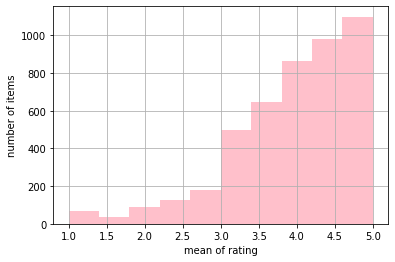

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xlabel('mean of rating')
plt.ylabel('number of items')

ratings['rating'].hist(color="pink")

Let's now visualize the relationship between the two variables: rating and the number of ratings;

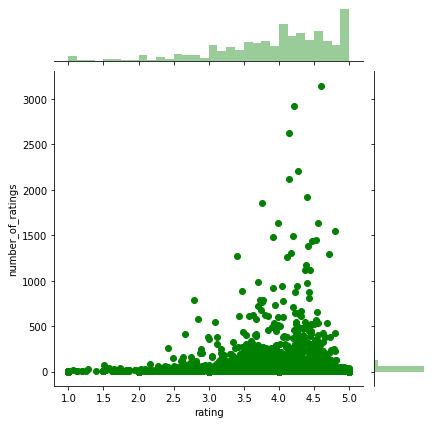

In [39]:
import seaborn as sns
sns.jointplot(x='rating', y='number_of_ratings', data=ratings, kind="scatter", color="g")

We can achieve this by computing the correlation between these two categories’ ratings and the ratings of the rest of the categories in the dataset. The first step is to create a dataframe with the ratings of these categories from our `user_matrix`. I will entail the item_id and user_id to build a recommender.

In [40]:
# getting a count of users who have rated 15 or more items
count = train_data.user_id.value_counts()
df = train_data[train_data.user_id.isin(count[count >=15].index)]

In [41]:
user_matrix = df.pivot(index = 'user_id', columns ='item_id', values = 'rating').fillna(0)
user_matrix

item_id,79,314,362,646,695,752,828,897,1119,1294,...,3975,4018,4019,4385,4401,4430,4536,4558,4559,4628
user_id,,,,,,,,,,,,,,,,,,,,,
7605,0.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,4.0,0.0,4.0,5.0,4.0
80476,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,5.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0


In [42]:
print('Shape of the pivot table: ', user_matrix.shape)

Shape of the pivot table:  (3, 54)


Next let’s look at the most rated items and choose two of them to work with in this simple recommender system. We use pandas `sort_values` utility and set ascending to false in order to arrange the items from the most rated. We then use the `head()` function to view the top 10.

In [43]:
ratings.sort_values('number_of_ratings', ascending=False).head(10)

,rating,number_of_ratings
item_id,,
2340,4.597774,3145
1575,4.217883,2919
1886,4.141226,2627
2486,4.268987,2212
2129,4.141371,2115
283,4.401357,1916
457,3.752973,1850
1124,3.993880,1634
2483,4.551408,1634


In [44]:
# Let's define the user index

#define user index from 0 to 10
user_matrix['user_index'] = np.arange(0, user_matrix.shape[0], 1)
user_matrix.head()

item_id,79,314,362,646,695,752,828,897,1119,1294,...,4018,4019,4385,4401,4430,4536,4558,4559,4628,user_index
user_id,,,,,,,,,,,,,,,,,,,,,
7605,0.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
46878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,3.0,4.0,0.0,4.0,5.0,4.0,1
80476,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,2


In [45]:
user_matrix.set_index(['user_index'], inplace=True)

# Actual ratings given by users
user_matrix.head()

item_id,79,314,362,646,695,752,828,897,1119,1294,...,3975,4018,4019,4385,4401,4430,4536,4558,4559,4628
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,4.0,0.0,4.0,5.0,4.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,5.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0



Since this is a sparse dataset, let's implement Singular Value Decomposition. Singular Value Decomposition (SVD) provides another way to factorize a matrix, into singular vectors and singular values. The SVD allows us to discover some of the same kind of information, which helps us denoise the data and reduce sparsity.

Let's now implement SVD to make certain subsequent matrix calculations simpler.

In [46]:
from scipy.linalg import svd

# Singular Value Decomposition
U, sigma, Vt = svds(user_matrix, k=2)

In [47]:
print('Left singular matrix: \n', U)
print('Sigma: \n',sigma)

Left singular matrix: 
 [[-8.83829741e-01  1.05471187e-15]
 [-4.67808710e-01  1.11022302e-16]
 [ 1.33226763e-15  1.00000000e+00]]
Sigma: 
 [20.27886666 21.16601049]


In [48]:
# Converting the sigma into a diagonal matrix
sigma = np.diag(sigma)
print('Diagonal matrix: \n',sigma)

print('Right singular matrix: \n', Vt)

Diagonal matrix: 
 [[20.27886666  0.        ]
 [ 0.         21.16601049]]
Right singular matrix: 
 [[ 2.62789366e-16 -1.74335135e-01 -2.17918919e-01 -2.17918919e-01
  -2.17918919e-01 -2.17918919e-01 -2.17918919e-01 -1.74335135e-01
  -2.17918919e-01 -2.17918919e-01 -2.17918919e-01 -3.33262818e-01
  -1.15343899e-01 -1.15343899e-01 -9.22751193e-02 -1.74335135e-01
  -6.92063395e-02 -2.17918919e-01  2.62789366e-16  3.28486708e-16
   3.28486708e-16 -2.17918919e-01  3.28486708e-16 -2.17918919e-01
   3.28486708e-16  3.28486708e-16  3.28486708e-16  3.28486708e-16
   3.28486708e-16  3.28486708e-16  3.28486708e-16 -9.22751193e-02
  -1.15343899e-01 -1.15343899e-01 -2.17918919e-01  3.28486708e-16
  -6.92063395e-02 -1.15343899e-01 -9.22751193e-02  2.62789366e-16
  -2.17918919e-01 -1.15343899e-01  3.28486708e-16 -9.22751193e-02
   3.28486708e-16  3.28486708e-16  3.28486708e-16 -1.15343899e-01
  -6.92063395e-02 -9.22751193e-02  3.28486708e-16 -9.22751193e-02
  -1.15343899e-01 -9.22751193e-02]
 [ 1.889

In [49]:
#Predicted ratings
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 

# Convert predicted ratings to dataframe
preds = pd.DataFrame(all_user_predicted_ratings, columns = user_matrix.columns)
preds.head()

item_id,79,314,362,646,695,752,828,897,1119,1294,...,3975,4018,4019,4385,4401,4430,4536,4558,4559,4628
0,-4.911435e-16,3.124620e+00,3.905775e+00,3.905775e+00,3.905775e+00,3.905775e+00,3.905775e+00,3.124620e+00,3.905775e+00,3.905775e+00,...,-6.139294e-16,-6.139294e-16,-6.139294e-16,2.067316e+00,1.240390e+00,1.653853e+00,-6.139294e-16,1.653853e+00,2.067316e+00,1.653853e+00
1,-2.048896e-15,1.653853e+00,2.067316e+00,2.067316e+00,2.067316e+00,2.067316e+00,2.067316e+00,1.653853e+00,2.067316e+00,2.067316e+00,...,-2.561120e-15,-2.561120e-15,-2.561120e-15,1.094225e+00,6.565350e-01,8.753800e-01,-2.561120e-15,8.753800e-01,1.094225e+00,8.753800e-01
2,4.000000e+00,-4.911435e-16,-6.139294e-16,-6.139294e-16,-6.139294e-16,-6.139294e-16,-6.139294e-16,-4.911435e-16,-6.139294e-16,-6.139294e-16,...,5.000000e+00,5.000000e+00,5.000000e+00,-2.561120e-15,-1.536672e-15,-2.048896e-15,5.000000e+00,-2.048896e-15,-2.561120e-15,-2.048896e-15


We can now recommend the items with the highest predicted ratings:

In [50]:
# Recommending the items with the highest predicted ratings

def recommend_items(user_id, item_matrix, preds, num_recommendations):
    # index starts at 0  
    user_idx = user_id - 1 
    
    # Get and sort the user's ratings
    sorted_user_ratings = item_matrix.iloc[user_idx].sort_values(ascending=False)
    
    #sorted_user_ratings
    sorted_user_predictions = preds.iloc[user_idx].sort_values(ascending=False)
    
    #sorted_user_predictions
    temp = pd.concat([sorted_user_ratings, sorted_user_predictions], axis=1)
    temp.index.name = 'Recommended Items'
    temp.columns = ['user_ratings', 'user_predictions']
    temp = temp.loc[temp.user_ratings == 0]   
    temp = temp.sort_values('user_predictions', ascending=False)
    print('\n Recommended items for user(user_id = {}):\n'.format(user_id))
    print(temp.head(num_recommendations))

Let's take a look into of the recommended items for a given user:

In [51]:
user_id = 3
num_recommendations = 5
recommend_items(user_id, user_matrix, preds, num_recommendations)


 Recommended items for user(user_id = 3):

                   user_ratings  user_predictions
Recommended Items                                
314                         0.0     -4.911435e-16
897                         0.0     -4.911435e-16
1725                        0.0     -4.911435e-16
1455                        0.0     -6.139294e-16
3630                        0.0     -6.139294e-16


In [52]:
user_id = 2
num_recommendations = 5
recommend_items(user_id, user_matrix, preds, num_recommendations)


 Recommended items for user(user_id = 2):

                   user_ratings  user_predictions
Recommended Items                                
1780                        0.0          2.067316
1119                        0.0          2.067316
3630                        0.0          2.067316
2435                        0.0          2.067316
2284                        0.0          2.067316


In [53]:
user_id = 1
num_recommendations = 5
recommend_items(user_id, user_matrix, preds, num_recommendations)


 Recommended items for user(user_id = 1):

                   user_ratings  user_predictions
Recommended Items                                
3189                        0.0          2.067316
1670                        0.0          2.067316
4559                        0.0          2.067316
4385                        0.0          2.067316
3698                        0.0          2.067316


As you could see, using our user-based collaborative filtering model all three users are given different product recommendations based on their past purchasing habits of Amazon's electronic products.

**Evaluation**

In [54]:
# Actual ratings given by the users
user_matrix.head()

item_id,79,314,362,646,695,752,828,897,1119,1294,...,3975,4018,4019,4385,4401,4430,4536,4558,4559,4628
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,4.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,3.0,4.0,0.0,4.0,5.0,4.0
2,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,5.0,5.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0


In [55]:
# Average ACTUAL rating for each item
user_matrix.mean().head() 

item_id
79     1.333333
314    1.333333
362    1.666667
646    1.666667
695    1.666667
dtype: float64

In [56]:
# Average PREDICTED rating for each item
preds.mean().head()

item_id
79     1.333333
314    1.592824
362    1.991030
646    1.991030
695    1.991030
dtype: float64

We will evaluate our model using the Root Mean Squared Error(RMSE). RMSE is a frequently used measure of the differences between values predicted by a model or an estimator and the values observed.

In our case, we will evaluate the model based on predicted ratings and actual ratings.

In [57]:
rmse = pd.concat([user_matrix.mean(), preds.mean()], axis=1)
rmse.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse.shape)

rmse['item_index'] = np.arange(0, rmse.shape[0], 1)
rmse.head()

(54, 2)


,Avg_actual_ratings,Avg_predicted_ratings,item_index
item_id,,,
79,1.333333,1.333333,0
314,1.333333,1.592824,1
362,1.666667,1.991030,2
646,1.666667,1.991030,3
695,1.666667,1.991030,4


In [58]:
RMSE = round((((rmse.Avg_actual_ratings - rmse.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('\nRMSE SVD Model = {} \n'.format(RMSE))


RMSE SVD Model = 0.35343 



The smaller the RMSE, the better, you can make theoretical claims on levels of the RMSE by knowing what is expected from your data.A high RMSE means a higher chance to overfit. Since we received a lower RMSE, our model is performing faily well.

# Popularity-based Recommender System

A popularity based recommender system recommends to users based on how popular those items are among other users. It is a non-personalised recommender system and these are based on frequecy counts. 



In [59]:
data1 = train_data.groupby('item_id').agg({'user_id': 'count'}).reset_index()
data1.rename(columns = {'user_id': 'score'},inplace=True)
data1.head(10) 

,item_id,score
0,0,84
1,1,39
2,2,1435
3,3,103
4,4,6
5,5,12
6,6,6
7,7,29
8,8,11
9,9,1


In [60]:
#Sort the products on recommendation score 
data1_sort = data1.sort_values(['score', 'item_id'], ascending = [0,1]) 
      
#Generate a recommendation rank based upon score 
data1_sort['rank'] = data1_sort['score'].rank(ascending=0, method='first') 
          
#What are the top 5 recommendations?
popularity_recommendations = data1_sort.head(5) 
popularity_recommendations

,item_id,score,rank
2336,2340,3145,1.0
1574,1575,2919,2.0
1882,1886,2627,3.0
2480,2486,2212,4.0
2125,2129,2115,5.0


In [61]:
# Use popularity based recommender model to make predictions
def recommend(user_id):     
    user_recommendations = popularity_recommendations 
          
    #Add user_id column for which the recommendations are being generated 
    user_recommendations['user_id'] = user_id 
      
    #Bring user_id column to the front 
    cols = user_recommendations.columns.tolist() 
    cols = cols[-1:] + cols[:-1] 
    user_recommendations = user_recommendations[cols] 
          
    return user_recommendations

In [62]:
find_recommendations = [10,100,150]   # This list is user choice.
for i in find_recommendations:
    print("The list of recommendations for the user_id: %d\n" %(i))
    print(recommend(i))    
    print("\n")

The list of recommendations for the user_id: 10

      user_id  item_id  score  rank
2336       10     2340   3145   1.0
1574       10     1575   2919   2.0
1882       10     1886   2627   3.0
2480       10     2486   2212   4.0
2125       10     2129   2115   5.0


The list of recommendations for the user_id: 100

      user_id  item_id  score  rank
2336      100     2340   3145   1.0
1574      100     1575   2919   2.0
1882      100     1886   2627   3.0
2480      100     2486   2212   4.0
2125      100     2129   2115   5.0


The list of recommendations for the user_id: 150

      user_id  item_id  score  rank
2336      150     2340   3145   1.0
1574      150     1575   2919   2.0
1882      150     1886   2627   3.0
2480      150     2486   2212   4.0
2125      150     2129   2115   5.0




Accordingly, item_id '2336' is the most popular item in our electronic dataset. It has a higher score among 'user_id' 10, 100, and 150. 

Since, it is a Popularity recommender model, so, all the three users are given the same recommendations. Here, we predict the products based on the popularity. It is not personalized to particular user. It is a non-personalized recommender system. Looks like headphones are the most popular item category.


**Evaluation**

In [65]:
rmse = pd.concat([data1.mean(), popularity_recommendations.mean()], axis=1)
rmse.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse.shape)


(4, 2)


In [66]:
RMSE = round((((rmse.Avg_actual_ratings - rmse.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('\nRMSE SVD Model = {} \n'.format(RMSE))


RMSE SVD Model = 1815.73609 



Our RMSE value is extremely high.This may mean the popularity model is overfit.

# KNN Recommender Model

K-nearest neighbor algorithm finds the k most similar items to a particular user based on a given distance metric.

To recommend similar items to the user, let's first find k-similar items and then recommend them to user. In this case I’ve retrieved top 5 most similar items to a given query. 

**Reshaping the data**

In [67]:
knn_data = data_clean.drop(columns=['category'])

In [68]:
from sklearn.model_selection import train_test_split

knn_train, knn_test = train_test_split(data_clean, test_size=0.3, random_state=33)

print(knn_train.shape, knn_test.shape)
print(knn_test[0:5])

(210000, 4) (90000, 4)
        item_id  user_id  rating                 category
271583     1094   254468     4.0   Portable Audio & Video
7775          5     7504     3.0           Camera & Photo
179431     1124   169524     3.0  Computers & Accessories
276157     3932   258597     5.0   Accessories & Supplies
100556     1670    95572     5.0               Headphones


In [69]:
# First let's create a dataset called X
X = np.array(knn_data)
 # create train and test
percent = 0.7
size = int(np.floor(percent * len(knn_data)))
knn_train = X[:size]
knn_test = X[size:]
#len of train and test
lentrain = len(knn_train)
lentest = len(knn_test)

In [75]:
from sklearn.neighbors import NearestNeighbors

neighbors = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(knn_train)

# Let's find the k-neighbors of each point in object X. To do that we call the kneighbors() function on object X.
distances, indices = neighbors.kneighbors(knn_train)

Let's now see what product we could recommend the user along with its rating. For this, I will use a specific product to see how similar it is to  another.

In [78]:
#find most related products
for i in range(lentest):
    a = neighbors.kneighbors([knn_test[i]])
    related_product_list = a[1]

    first_related_product = [item[0] for item in related_product_list]
    first_related_product = str(first_related_product).strip('[]')
    first_related_product = int(first_related_product)
    second_related_product = [item[1] for item in related_product_list]
    second_related_product = str(second_related_product).strip('[]')
    second_related_product = int(second_related_product)

print ("Based on product reviews, for ", knn_data["item_id"][150] ," average rating is ",knn_data["rating"][150])
print ("The first similar product is ", knn_data["item_id"][first_related_product] ," average rating is ",knn_data["rating"][first_related_product])
print ("The second similar product is ", knn_data["item_id"][second_related_product] ," average rating is ",knn_data["rating"][second_related_product])
print ("-----------------------------------------------------------")

Based on product reviews, for  7  average rating is  5.0
The first similar product is  3683  average rating is  5.0
The second similar product is  3703  average rating is  5.0
-----------------------------------------------------------


**Evaluation**

In [80]:
from sklearn import neighbors

# Predicting the rating

train_target = knn_data["rating"][:lentrain]
test_target = knn_data["rating"][lentrain:lentrain+lentest]
train_target = train_target.astype(int)
test_target = test_target.astype(int)

n_neighbors = 3
knn_clf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knn_clf.fit(knn_train, train_target)
knnpred_test = knn_clf.predict(knn_test)

In [81]:
print(classification_report(test_target, knnpred_test))
print ("Accuracy: ",accuracy_score(test_target, knnpred_test))
print("MSE: ",mean_squared_error(test_target, knnpred_test))

              precision    recall  f1-score   support

           1       0.09      0.01      0.01      8446
           2       0.07      0.00      0.01      5163
           3       0.08      0.00      0.01      7146
           4       0.21      0.02      0.03     17128
           5       0.58      0.97      0.73     52117

    accuracy                           0.57     90000
   macro avg       0.21      0.20      0.16     90000
weighted avg       0.39      0.57      0.43     90000

Accuracy:  0.5666
MSE:  2.5934777777777778


# Category-based Collaborative Filtering

Item-based collaborative filtering: These systems identify similar items based on users’ previous ratings. For example if users A,B and C gave a 5 star rating to books X and Y then when a user D buys book Y they also get a recommendation to purchase book X because the system identifies book X and Y as similar based on the ratings of users A,B and C. 

In this instance, I used the algorithm to find similar patterns between categories and then recommend a relevant category to the user.

Let's now take a look into the similarities between two product categories.

In [82]:
ratings = pd.DataFrame(train_data.groupby('category')['rating'].mean())
ratings['number_of_ratings'] = train_data.groupby('category')['rating'].count()

In [83]:
# building a product category matrix:
category_matrix = train_data.pivot_table(index = 'user_id', columns ='category', values = 'rating').fillna(0)
category_matrix.head()

category,Accessories & Supplies,Camera & Photo,Car Electronics & GPS,Computers & Accessories,Headphones,Home Audio,Portable Audio & Video,Security & Surveillance,Television & Video,Wearable Technology
user_id,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0


Next let’s look at the most rated categories and choose two of them to work with in this simple recommender system. We use pandas `sort_values` utility and set ascending to false in order to arrange the category from the most rated. We then use the `head()` function to view the top 10.

In [88]:
ratings['rating'].sort_values()

category
Wearable Technology        3.422145
Security & Surveillance    3.697353
Television & Video         3.938778
Portable Audio & Video     3.976388
Home Audio                 3.980515
Camera & Photo             4.009696
Headphones                 4.013831
Computers & Accessories    4.042391
Car Electronics & GPS      4.128841
Accessories & Supplies     4.202920
Name: rating, dtype: float64

In [89]:
ratings.sort_values('number_of_ratings', ascending=False).head(10)

,rating,number_of_ratings
category,,
Computers & Accessories,4.042391,57394
Headphones,4.013831,47286
Camera & Photo,4.009696,42490
Accessories & Supplies,4.202920,29726
Portable Audio & Video,3.976388,14696
Television & Video,3.938778,8657
Car Electronics & GPS,4.128841,5565
Home Audio,3.980515,3028
Security & Surveillance,3.697353,869


Let's now look for similarities between two product categories. 

We can achieve this by computing the correlation between these two categories’ ratings and the ratings of the rest of the categories in the dataset. The first step is to create a dataframe with the ratings of these categories from our `category_matrix`.

In [90]:
computers_user_rating = category_matrix['Computers & Accessories']
headphones_user_rating = category_matrix['Headphones'] 

Let's now identify the correlation between the two categories of movies. I will use pandas `corwith` functionality. Let's use this functionality to get the correlation between each computer's rating and the ratings of headphones.

In [91]:
similar_to_computers= category_matrix.corrwith(computers_user_rating)
similar_to_computers.head()

category
Accessories & Supplies    -0.208648
Camera & Photo            -0.250740
Car Electronics & GPS     -0.086708
Computers & Accessories    1.000000
Headphones                -0.271277
dtype: float64

In [92]:
similar_to_headphones= category_matrix.corrwith(headphones_user_rating)
similar_to_headphones.head()

category
Accessories & Supplies    -0.186064
Camera & Photo            -0.229123
Car Electronics & GPS     -0.077208
Computers & Accessories   -0.271277
Headphones                 1.000000
dtype: float64

Let's now join the ratings and number of rating to check the correlation.

In [93]:
corr_computers = pd.DataFrame(similar_to_computers, columns=['correlation'])
corr_computers.dropna(inplace=True)

corr_computers = corr_computers.join(ratings['number_of_ratings'])
corr_computers .head()

,correlation,number_of_ratings
category,,
Accessories & Supplies,-0.208648,29726
Camera & Photo,-0.250740,42490
Car Electronics & GPS,-0.086708,5565
Computers & Accessories,1.000000,57394
Headphones,-0.271277,47286


In [94]:
corr_headphones = pd.DataFrame(similar_to_headphones, columns=['correlation'])
corr_headphones.dropna(inplace=True)

corr_headphones = corr_headphones.join(ratings['number_of_ratings'])
corr_headphones .head()

,correlation,number_of_ratings
category,,
Accessories & Supplies,-0.186064,29726
Camera & Photo,-0.229123,42490
Car Electronics & GPS,-0.077208,5565
Computers & Accessories,-0.271277,57394
Headphones,1.000000,47286


In [95]:
corr_computers[corr_computers['number_of_ratings'] > 10].sort_values(by='correlation', ascending=False).head(10)

,correlation,number_of_ratings
category,,
Computers & Accessories,1.000000,57394
Wearable Technology,-0.017722,289
Security & Surveillance,-0.031016,869
Home Audio,-0.059593,3028
Car Electronics & GPS,-0.086708,5565
Television & Video,-0.105259,8657
Portable Audio & Video,-0.139974,14696
Accessories & Supplies,-0.208648,29726
Camera & Photo,-0.250740,42490


In [96]:
corr_headphones[corr_headphones['number_of_ratings'] > 10].sort_values(by='correlation', ascending=False).head(10)

,correlation,number_of_ratings
category,,
Headphones,1.000000,47286
Wearable Technology,-0.015867,289
Security & Surveillance,-0.027736,869
Home Audio,-0.053742,3028
Car Electronics & GPS,-0.077208,5565
Television & Video,-0.094304,8657
Portable Audio & Video,-0.122424,14696
Accessories & Supplies,-0.186064,29726
Camera & Photo,-0.229123,42490


It seems like 'Camera & Photo' is correlated with both 'Computer & Accessories' and 'Headphones'. Therefore, we could recommend the camera and photo catgory since it's similar to the former two categories.

**Evaluation**

In [97]:
# calcaute the similarity using cosine distance
dist_out = 1 - sklearn.metrics.pairwise.cosine_distances(ratings)
# the type of the distance matrix will be the same type of the rating matrix
print(type(dist_out))
# the deminsion of the matrix will be a square matirx of size equal to the number of users .
print(dist_out.shape)
print(""" \n\n <<<<<<<<< sample dataset of the distance matrix >>>>>>>>>>>>>> """)
print(dist_out)

<class 'numpy.ndarray'>
(10, 10)
 

 <<<<<<<<< sample dataset of the distance matrix >>>>>>>>>>>>>> 
[[1.         1.         0.99999982 1.         1.         0.99999931
  0.99999999 0.99999154 0.99999995 0.99993156]
 [1.         1.         0.99999979 1.         1.         0.99999926
  0.99999998 0.99999135 0.99999993 0.99993101]
 [0.99999982 0.99999979 1.         0.99999977 0.99999978 0.99999984
  0.99999989 0.99999383 0.99999996 0.99993841]
 [1.         1.         0.99999977 1.         1.         0.99999923
  0.99999998 0.99999125 0.99999993 0.99993073]
 [1.         1.         0.99999978 1.         1.         0.99999924
  0.99999998 0.99999131 0.99999993 0.9999309 ]
 [0.99999931 0.99999926 0.99999984 0.99999923 0.99999924 1.
  0.99999946 0.99999568 0.99999963 0.9999446 ]
 [0.99999999 0.99999998 0.99999989 0.99999998 0.99999998 0.99999946
  1.         0.99999206 0.99999998 0.99993307]
 [0.99999154 0.99999135 0.99999383 0.99999125 0.99999131 0.99999568
  0.99999206 1.         0.99999278

In [98]:
# Prediciting unknown ratings for a user
user_pred = dist_out.dot(ratings) / np.array([np.abs(dist_out).sum(axis=1)]).T
print("\n\n user prediction")
print(user_pred)



 user prediction
[[3.94128966e+00 2.10001603e+04]
 [3.94128970e+00 2.10001621e+04]
 [3.94128925e+00 2.10001384e+04]
 [3.94128971e+00 2.10001629e+04]
 [3.94128970e+00 2.10001624e+04]
 [3.94128885e+00 2.10001175e+04]
 [3.94128957e+00 2.10001556e+04]
 [3.94128681e+00 2.10000101e+04]
 [3.94128945e+00 2.10001489e+04]
 [3.94128156e+00 2.09997330e+04]]


In [99]:
# Actual ratings given by the users
category_matrix.head()

category,Accessories & Supplies,Camera & Photo,Car Electronics & GPS,Computers & Accessories,Headphones,Home Audio,Portable Audio & Video,Security & Surveillance,Television & Video,Wearable Technology
user_id,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0


In [100]:
# Average ACTUAL rating for each item
category_matrix.mean().head()

category
Accessories & Supplies     0.620550
Camera & Photo             0.823307
Car Electronics & GPS      0.114323
Computers & Accessories    1.134850
Headphones                 0.933387
dtype: float64

In [101]:
# Using Singular Value Decomposition

U, sigma, Vt = svds(category_matrix, k = 3)

In [102]:
print('Left singular matrix: \n',U)
print('Sigma: \n',sigma)
print('Right singular matrix: \n',Vt)

Left singular matrix: 
 [[-4.62470109e-05  5.09709021e-05 -4.39223818e-05]
 [-4.62470109e-05  5.09709021e-05 -4.39223818e-05]
 [-2.77482066e-05  3.05825413e-05 -2.63534291e-05]
 ...
 [-5.80624103e-03  4.90088967e-04 -3.21174035e-04]
 [-4.62470109e-05  5.09709021e-05 -4.39223818e-05]
 [-4.64499282e-03  3.92071174e-04 -2.56939228e-04]]
Sigma: 
 [ 854.98605127  909.50515991 1010.92754556]
Right singular matrix: 
 [[-3.92985643e-02 -9.92851018e-01 -1.76731166e-03  5.57538557e-02
   9.75442284e-02 -1.37813182e-03 -7.90810985e-03 -4.43325453e-04
  -3.36003458e-03 -2.50305381e-04]
 [ 3.60944769e-02  8.91476889e-02  1.97565119e-03 -1.15072738e-01
   9.88636834e-01  1.50021841e-03  9.27165969e-03  4.26595915e-04
   3.61080193e-03  1.26295741e-04]
 [-3.23071221e-02 -6.49367359e-02 -2.39422917e-03 -9.91418679e-01
  -1.08253537e-01 -1.98441396e-03 -8.88046913e-03 -5.30751508e-04
  -4.56134478e-03 -1.53434595e-04]]


In [103]:
# Construct diagonal array in SVD
sigma = np.diag(sigma)
print('Diagonal matrix: \n',sigma)

Diagonal matrix: 
 [[ 854.98605127    0.            0.        ]
 [   0.          909.50515991    0.        ]
 [   0.            0.         1010.92754556]]


In [104]:
#Predicted ratings
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 

# Convert predicted ratings to dataframe
preds_cf = pd.DataFrame(all_user_predicted_ratings, columns = category_matrix.columns)
preds_cf.head()

category,Accessories & Supplies,Camera & Photo,Car Electronics & GPS,Computers & Accessories,Headphones,Home Audio,Portable Audio & Video,Security & Surveillance,Television & Video,Wearable Technology
0,0.004662,0.046274,0.000268,0.036482,0.046781,0.000212,0.001137,0.000061,0.000503,0.000023
1,0.004662,0.046274,0.000268,0.036482,0.046781,0.000212,0.001137,0.000061,0.000503,0.000023
2,0.002797,0.027764,0.000161,0.021889,0.028069,0.000127,0.000682,0.000037,0.000302,0.000014
3,0.000932,0.009255,0.000054,0.007296,0.009356,0.000042,0.000227,0.000012,0.000101,0.000005
4,0.001865,0.018510,0.000107,0.014593,0.018713,0.000085,0.000455,0.000024,0.000201,0.000009


In [105]:
# Average ACTUAL rating for each category
category_matrix.mean().head()

category
Accessories & Supplies     0.620550
Camera & Photo             0.823307
Car Electronics & GPS      0.114323
Computers & Accessories    1.134850
Headphones                 0.933387
dtype: float64

In [106]:
# Average PREDICTED rating for each item
preds_cf.mean().head()

category
Accessories & Supplies     0.101434
Camera & Photo             0.849839
Car Electronics & GPS      0.006103
Computers & Accessories    1.151131
Headphones                 0.955216
dtype: float64

In [107]:
# Evaluating through Root-mean-square deviation (RMSE)
rmse_cf = pd.concat([category_matrix.mean(), preds_cf.mean()], axis=1)
rmse_cf.columns = ['Avg_actual_ratings', 'Avg_predicted_ratings']
print(rmse_cf.shape)

rmse_cf['item_index'] = np.arange(0, rmse_cf.shape[0], 1)
rmse_cf.head()

(10, 2)


,Avg_actual_ratings,Avg_predicted_ratings,item_index
category,,,
Accessories & Supplies,0.620550,0.101434,0
Camera & Photo,0.823307,0.849839,1
Car Electronics & GPS,0.114323,0.006103,2
Computers & Accessories,1.134850,1.151131,3
Headphones,0.933387,0.955216,4


In [109]:
RMSE = round((((rmse.Avg_actual_ratings - rmse.Avg_predicted_ratings) ** 2).mean() ** 0.5), 5)
print('\nRMSE SVD Model = {} \n'.format(RMSE))


RMSE SVD Model = 1815.73609 



# Evaluation

In our analysis, I used the following metric to evaluate the performance of our recommender models. 

- RMSE : Indicates the absolute fit of the model to the data–how close the observed data points are to the model's predicted values. Lower values of RMSE indicate better fit, such as our user-based collaborative model. 

- Precision and Recall: These are binary metrics used to evaluate models with binary output. Precision at k is the proportion of recommended items in the top-k set that are relevant whereas, recall is the proportion of relevant items found in the top-k recommendations. A system with high recall but low precision returns many results, but most of its predicted labels are incorrect when compared to the training labels. In our KNN model we have a weighted average F1 score of 0.43 which may mean that our model isn't performing well.

- Correlation: I used Pearson Correlation matrix to check the correlation between two categories. Next, I recommended the category which is highly correlated to two other similar categories in the category-based model.

# Insights and Recommendation

- The Popularity-based recommender system is a non-personalised recommender system and these are based on frequecy counts, which may be not suitable to the user. Even though this algorithm is easy to implement, it only takes into account the most popular items in the dataset. 

- The User-based collaborative model finds similar users and gives a recommendation based on what other people with similar patterns appreciated. Our findings indicate that given different product recommendations based on their past purchasing habits of Amazon's electronic products. Further more this model provides a lower RMSE meaning it is a better fit for our predicted recommendations.

- KNN Recommender: This model filters the K nearest items for the user. 

- Category-based Collaborative Filtering is a personalised recommender system, the recommendations are based on the past behavior of the user and it is not dependent on any additional information. This algorithms takes a closer look into the items in the category and the recommends the relevant category based on two similar categories to the user. 
Moreover, I believe that this model is based as it takes into account an entire category instead of the individual item to recommend to the user. 


## Future Work

- I plan on building more recommendation models and evaluating their performance against advanced metrics to derive better performance.
- Certain recommender models can be biased, I would like to further implement a model to reduce the biases.
- Learn more about the new recommender systems and apply it to my current project.
- This is a big dataset and I would like to use Spark to efefctively run the algorithms.

# Resources:

- [Amazon Recommendations](http://rejoiner.com/resources/amazon-recommendations-secret-selling-online/)
- [Singular Value Decomposition](https://www.freecodecamp.org/news/singular-value-decomposition-vs-matrix-factorization-in-recommender-systems-b1e99bc73599/)
- [Scikit-Learn Evaluation Metrics](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)

